In [2]:
%pip install netCDF4 numpy geopandas rasterio matplotlib

   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
    --------------------------------------- 0.1/7.0 MB 3.5 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.0 MB 5.0 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.0 MB 4.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.0 MB 4.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/7.0 MB 4.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/7.0 MB 4.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.2/7.0 MB 3.9 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/7.0 MB 3.9 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.0 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.7/7.0 MB 3.9 MB/s eta 0:00:02
   ---------- ----------------------------- 1.9/7.0 MB 4.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.1/7.0 MB 4.1 MB/s eta 0:00:02
   ------------ ---

In [3]:
import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
import matplotlib.pyplot as plt
from shapely.geometry import box
import netCDF4 as nc
import numpy as np
import pandas as pd
from rasterio.transform import from_origin


In [18]:
#show information of the nc 
# Replace 'your_file.nc' with the path to your .nc file
file_path = 'C:/Users/Lyn/Desktop/nwm.t00z.short_range.channel_rt.f001.conus.nc'

# Open the NetCDF file
ds = nc.Dataset(file_path, 'r')

# Print the file metadata
print(ds)

# List all variables
print(ds.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    TITLE: OUTPUT FROM NWM v3.0
    featureType: timeSeries
    proj4: +proj=lcc +units=m +a=6370000.0 +b=6370000.0 +lat_1=30.0 +lat_2=60.0 +lat_0=40.0 +lon_0=-97.0 +x_0=0 +y_0=0 +k_0=1.0 +nadgrids=@
    model_initialization_time: 2024-07-11_00:00:00
    station_dimension: feature_id
    model_output_valid_time: 2024-07-11_01:00:00
    model_total_valid_times: 18
    stream_order_output: 1
    cdm_datatype: Station
    Conventions: CF-1.6
    code_version: v5.3.0-alpha1
    NWM_version_number: v3.0
    model_output_type: channel_rt
    model_configuration: short_range
    dev_OVRTSWCRT: 1
    dev_NOAH_TIMESTEP: 3600
    dev_channel_only: 0
    dev_channelBucket_only: 0
    dev: dev_ prefix indicates development/internal meta data
    dimensions(sizes): feature_id(2776734), time(1), reference_time(1)
    variables(dimensions): int32 time(time), int32 reference_time(reference_time), |S1 crs(), int64 fea

In [19]:
import netCDF4 as nc
import pandas as pd



# Open the NetCDF file
ds = nc.Dataset(file_path, 'r')

# Prepare a list to hold the metadata
data = []

# Collect metadata for each variable
for var_name in ds.variables.keys():
    var = ds.variables[var_name]
    var_data = {'Variable': var_name}
    for attr_name in var.ncattrs():
        var_data[attr_name] = getattr(var, attr_name)
    data.append(var_data)

# Convert the list to a DataFrame
df = pd.DataFrame(data)

df

# Save DataFrame to a CSV file for further use if needed
#output_csv_path = r'D:/Hesham/CUAHSI/Geospatial/Datasets/Ponding_index/variable_metadata.csv'
#df.to_csv(output_csv_path, index=False)




,Variable,long_name,standard_name,units,valid_min,valid_max,transform_name,grid_mapping_name,esri_pe_string,spatial_ref,...,inverse_flattening,comment,cf_role,coordinates,grid_mapping,_FillValue,missing_value,scale_factor,add_offset,valid_range
0,time,valid output time,time,minutes since 1970-01-01 00:00:00 UTC,28677660.0,28678680.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,reference_time,model initialization time,forecast_reference_time,minutes since 1970-01-01 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,crs,CRS definition,NaN,NaN,NaN,NaN,latitude longitude,latitude longitude,"GEOGCS[""GCS_WGS_1984"",DATUM[""D_WGS_1984"",SPHER...","GEOGCS[""GCS_WGS_1984"",DATUM[""D_WGS_1984"",SPHER...",...,298.257233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,feature_id,Reach ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"NHDPlusv2 ComIDs within CONUS, arbitrary Reach...",timeseries_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,streamflow,River Flow,NaN,m3 s-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,latitude longitude,crs,-999900.0,-999900.0,0.01000,0.0,"[0, 5000000]"
5,nudge,Amount of stream flow alteration,NaN,m3 s-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,latitude longitude,crs,-999900.0,-999900.0,0.01000,0.0,"[-5000000, 5000000]"
6,velocity,River Velocity,NaN,m s-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,latitude longitude,crs,-999900.0,-999900.0,0.01000,0.0,"[0, 5000000]"
7,qSfcLatRunoff,Runoff from terrain routing,NaN,m3 s-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,latitude longitude,crs,-999900000.0,-999900000.0,0.00001,0.0,"[0, 2000000000]"
8,qBucket,Flux from gw bucket,NaN,m3 s-1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,latitude longitude,crs,-999900000.0,-999900000.0,0.00001,0.0,"[0, 2000000000]"
9,qBtmVertRunoff,Runoff from bottom of soil to bucket,NaN,m3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,latitude longitude,crs,-9999000.0,-9999000.0,0.00100,0.0,"[0, 20000000]"


C:\Users\Lyn\AppData\Local\Temp\ipykernel_14588\4011246696.py:48: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  clipped_gdf.plot(column='alt', ax=ax, legend=False, cmap='viridis', markersize=10)


KeyError: 'alt'

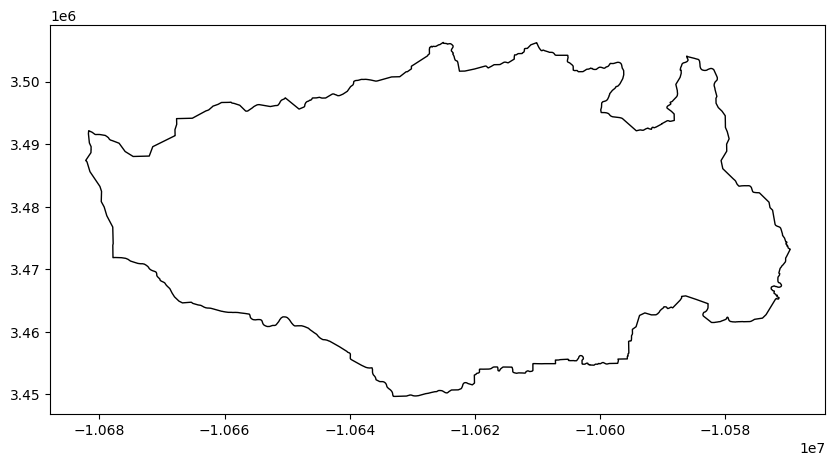

In [17]:
import netCDF4 as nc
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import from_origin
from shapely.geometry import box

# Paths to your files
nc_file_path = file_path
shapefile_path = 'C:/Users/Lyn/Documents/ArcGIS/CUAHSI_SI_2024/Houston_huc.shp'

# Open the NetCDF file and read the alt variable in chunks
ds = nc.Dataset(nc_file_path, 'r')
alt_var = ds.variables['sfcheadsubrt']
lon_var = ds.variables['x']
lat_var = ds.variables['y']

# Create a GeoDataFrame for the shapefile
shapefile_gdf = gpd.read_file(shapefile_path)

# Ensure the CRS matches
if shapefile_gdf.crs is None:
    shapefile_gdf.set_crs('EPSG:4326', inplace=True)

# Get the bounding box of the shapefile
bounds = shapefile_gdf.total_bounds
minx, miny, maxx, maxy = bounds

# Function to process chunks
def process_chunk(start_idx, end_idx):
    lon_chunk = lon_var[start_idx:end_idx]
    lat_chunk = lat_var[start_idx:end_idx]
    alt_chunk = alt_var[start_idx:end_idx]

    # Create a mask for the bounding box
    lon_mask = (lon_chunk >= minx) & (lon_chunk <= maxx)
    lat_mask = (lat_chunk >= miny) & (lat_chunk <= maxy)
    mask = lon_mask & lat_mask

    lon_clipped = lon_chunk[mask]
    lat_clipped = lat_chunk[mask]
    alt_clipped = alt_chunk[mask]

    return lon_clipped, lat_clipped, alt_clipped

# Process the data in chunks
chunk_size = 10000  # Adjust this size based on available memory
lon_clipped_all = []
lat_clipped_all = []
alt_clipped_all = []

for start_idx in range(0, len(lon_var), chunk_size):
    end_idx = min(start_idx + chunk_size, len(lon_var))
    lon_clipped, lat_clipped, alt_clipped = process_chunk(start_idx, end_idx)
    lon_clipped_all.append(lon_clipped)
    lat_clipped_all.append(lat_clipped)
    alt_clipped_all.append(alt_clipped)

# Combine all chunks
lon_clipped_all = np.concatenate(lon_clipped_all)
lat_clipped_all = np.concatenate(lat_clipped_all)
alt_clipped_all = np.concatenate(alt_clipped_all)

# Create a GeoDataFrame for the clipped data
clipped_gdf = gpd.GeoDataFrame({
    'x': lon_clipped_all,
    'y': lat_clipped_all,
    'sfcheadsubrt': alt_clipped_all
}, geometry=gpd.points_from_xy(lon_clipped_all, lat_clipped_all))

# Ensure the CRS matches for clipped data
clipped_gdf.set_crs(shapefile_gdf.crs, inplace=True)

# Clip the GeoDataFrame to the shapefile
clipped_gdf = gpd.clip(clipped_gdf, shapefile_gdf)

# Plot the clipped data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
shapefile_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
clipped_gdf.plot(column='alt', ax=ax, legend=False, cmap='viridis', markersize=10)

# Add color bar
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=clipped_gdf['alt'].min(), vmax=clipped_gdf['alt'].max()))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.02, pad=0.01)  # Adjust fraction and pad as needed
cbar.set_label('alt')

plt.title('Mapped Variable: alt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Save the clipped data as a raster
# Define the output raster properties
minx, miny, maxx, maxy = shapefile_gdf.total_bounds
ncols, nrows = 1000, 1000  # Adjust the resolution as needed
xres = (maxx - minx) / ncols
yres = (maxy - miny) / nrows
transform = from_origin(minx, maxy, xres, yres)

# Create an empty raster array
raster = np.full((nrows, ncols), np.nan)

# Rasterize the clipped GeoDataFrame
for _, row in clipped_gdf.iterrows():
    px = int((row['geometry'].x - minx) / xres)
    py = int((maxy - row['geometry'].y) / yres)
    if 0 <= px < ncols and 0 <= py < nrows:
        raster[py, px] = row['alt']

# Save the raster to a file
with rasterio.open(
    output_raster_path, 'w',
    driver='GTiff',
    height=nrows, width=ncols,
    count=1, dtype=str(raster.dtype),
    crs=shapefile_gdf.crs,
    transform=transform,
) as dst:
    dst.write(raster, 1)

print("Raster has been saved.")
